In [1]:
pip install julian

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import requests
import json
from datetime import datetime
import julian
import datetime
import scipy as scp
from scipy import stats
from IPython.display import Image
import math

Average Temperature in California (1900 - 2012)

Source: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [3]:
# Load Temp Data csv file
temp_csv = "AvgTemp_CA.csv"

# Read csv file
temp_data = pd.read_csv(temp_csv)
temp_data.head()

,DATE,MONTH,YEAR,AverageTemperature_CA
0,1/1/1900,1,1900,7.876
1,2/1/1900,2,1900,8.640
2,3/1/1900,3,1900,12.203
3,4/1/1900,4,1900,11.405
4,5/1/1900,5,1900,17.085


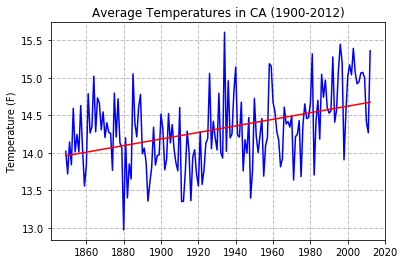

In [6]:
# Group by year
year_group = temp_data.groupby(["YEAR"])

# Calculate average temperature by year
temp_avg = year_group["AverageTemperature_CA"].mean().reset_index()

# Create variables for graph of average temperatures in CA (1900-2012)
x = temp_avg["YEAR"]
y = temp_avg["AverageTemperature_CA"]

# Add trendline
slope, intercept, r_value, p_value, std_err = scp.stats.linregress(x,y)
y_hat = x * slope + intercept


# Graph average temperatures by year
plt.plot(x, y, color="blue")
plt.plot(x,y_hat, color="red")
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.ylabel("Temperature (F)")
plt.title("Average Temperatures in CA (1900-2012)")

plt.show()

At this time, we are going to find average for every ten year.

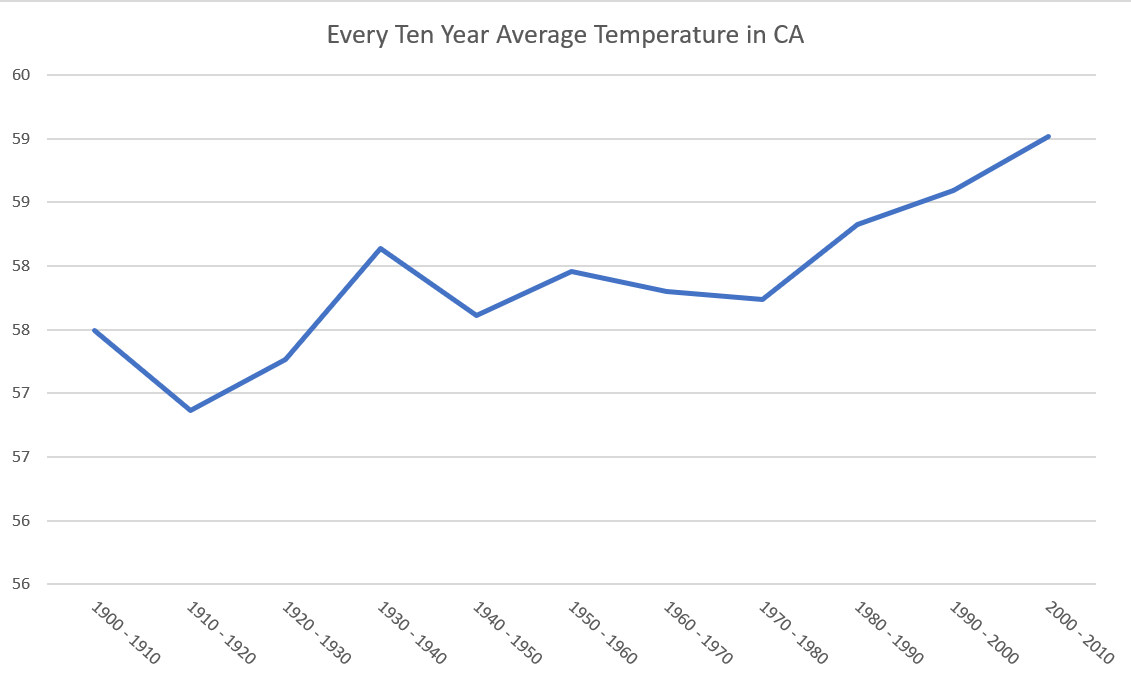

In [8]:
Image(filename='Ten_year.png') 

In [9]:
# Load CA Temp Data csv file
AvgTemp_CA_csv = "CA_Temps_2007_2018.csv"

# Convert to dataframe and sort by year and month
AvgTemp_CA = pd.read_csv(AvgTemp_CA_csv)
AvgTemp_CA.sort_values(by=["YEAR", "MONTH"], inplace=True, ascending=True)

In [10]:
# Connect to database
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")
fires = pd.read_sql_query("SELECT * FROM fires", conn)

In [11]:
# Convert from julian to calendar dates
fires["START_DATE"] = pd.to_datetime(fires["DISCOVERY_DATE"] - pd.Timestamp(0).to_julian_date(), unit='D')
fires["END_DATE"] = pd.to_datetime(fires["CONT_DATE"] - pd.Timestamp(0).to_julian_date(), unit='D')

# Drop unnecessary columns with drop function
fires.drop(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE_CLASS', 
       'OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME', 'Shape'], axis=1, inplace=True)

# Sort by start date
fires.sort_values(by=["START_DATE"], inplace=True, ascending=False)

#Filter by State to CA only
fires.drop(fires[fires.STATE != "CA"].index, inplace=True)

# Temperature Data: Average Annual Temperatures in CA
## Obtained average annual temperatures in CA from 2007-2018
### Source: https://www.usclimatedata.com/climate/winters/california/united-states/usca1252/2007/1

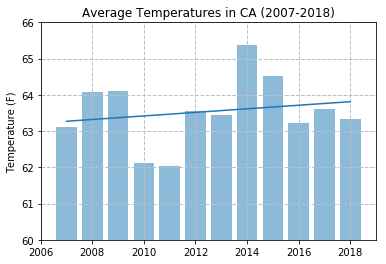

In [12]:
# Group by year
by_year = AvgTemp_CA.groupby(["YEAR"])

# Calculate average temperature by year
avg_temp = by_year["AVG_TEMP"].mean().reset_index()

# Create variables for graph of average temperatures in CA (2007-2018)
x_temp = avg_temp["YEAR"]
y_temp = avg_temp["AVG_TEMP"]

# Add trendline
slope, intercept, r_value, p_value, std_err = scp.stats.linregress(x_temp,y_temp)
y_hat = x_temp * slope + intercept

# Set y-axis limits
plt.ylim([math.ceil(60), math.ceil(66)])

# Graph average temperatures by year
plt.bar(x_temp, y_temp, align= "center", alpha=0.5)
plt.plot(x_temp,y_hat)
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.ylabel("Temperature (F)")
plt.title("Average Temperatures in CA (2007-2018)")

plt.show()

# Fire Data: Number of Fires and Acres Burned Annually
## Obtained historical wildfire data from 1992-2018
### Source (1992-2015): https://www.kaggle.com/rtatman/188-million-us-wildfires
### Source (2015-2018): https://en.wikipedia.org/wiki/2018_California_wildfires

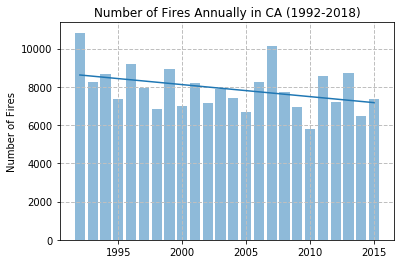

In [13]:
# Group by year
by_year = fires.groupby(["FIRE_YEAR"])

# Sum total fires by year
total_fires = by_year["FIRE_SIZE"].count().reset_index()

# Create variables for graph of number of fires by year
x_fires = total_fires["FIRE_YEAR"]
y_fires = total_fires["FIRE_SIZE"]

# Add trendline
slope, intercept, r_value, p_value, std_err = scp.stats.linregress(x_fires,y_fires)
y_hat = x_fires * slope + intercept

# Graph number of acres burned by year
plt.bar(x_fires, y_fires, align= "center", alpha=0.5)
plt.plot(x_fires,y_hat)
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.ylabel("Number of Fires")
plt.title("Number of Fires Annually in CA (1992-2018)")

plt.show()

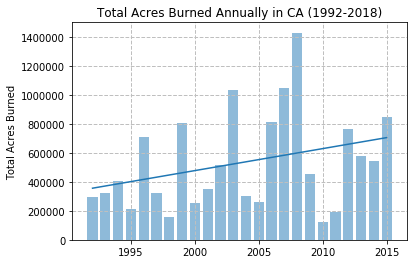

In [14]:
# Group by year
by_year = fires.groupby(["FIRE_YEAR"])

# Sum total acres burned by year
total_acres = by_year["FIRE_SIZE"].sum().reset_index()

# Create variables for graph of number of acres burned by year
x_acres = total_acres["FIRE_YEAR"]
y_acres = total_acres["FIRE_SIZE"]

# Add trendline
slope, intercept, r_value, p_value, std_err = scp.stats.linregress(x_acres,y_acres)
y_hat = x_acres * slope + intercept

# Graph number of acres burned by year
plt.bar(x_acres, y_acres, align= "center", alpha=0.5)
plt.plot(x_acres,y_hat)
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.ylabel("Total Acres Burned")
plt.title("Total Acres Burned Annually in CA (1992-2018)")

plt.show()

# Correlation? 
## Correlation shown below with the temperature graphed on y-axis, the annual precipitation graphed on the x-axis, and the size of acres burned represented by the size of the bubbles (for years 2007-2018)

In [15]:
# Reduce the fire data down to years with recent weather data (2007-2015) 
recent = fires[(fires["FIRE_YEAR"] < 2007)].index
fires.drop(recent , inplace=True)
fires.sort_values(by=["FIRE_YEAR"], inplace=True)

# Group by year (2007-2018)
by_RecentYear = fires.groupby(["FIRE_YEAR"])
                            
# Sum total acres burned by years 2007-2015
acres_recent = pd.DataFrame(by_RecentYear["FIRE_SIZE"].sum().reset_index()) 
acres_recent.columns = ["Year", "Acres Burned"]

# Add fire data for 2016-2018 obtaine from Wikepedia
df_acres = [{"Year": 2016, "Acres Burned": 669534}, {"Year": 2017, "Acres Burned": 1381405}, {"Year": 2017, "Acres Burned": 1893913}]
acres_recent = acres_recent.append(df_acres, ignore_index=True)

In [16]:
#Filter out months not is traditional fire season (May-October)
AvgTemp_CA.drop(AvgTemp_CA[AvgTemp_CA.MONTH < 5].index, inplace=True)
AvgTemp_CA.drop(AvgTemp_CA[AvgTemp_CA.MONTH > 10].index, inplace=True)

# Group by year
by_FireSeason = AvgTemp_CA.groupby(["YEAR"])

# Calculate average temperature by year
avg_temp_FS = pd.DataFrame(by_FireSeason["AVG_TEMP"].mean().reset_index())
precipitation_FS = pd.DataFrame(by_FireSeason["PRECIPITATION"].sum().reset_index())
precipitation_FS
Fires_Season = {
        "Year": avg_temp_FS["YEAR"],
        "Avg Temp": avg_temp_FS["AVG_TEMP"],
        "Precipitation": precipitation_FS["PRECIPITATION"],
        "Acres Burned": acres_recent["Acres Burned"]}
Fires_Season_df = pd.DataFrame(Fires_Season, columns = ["Year", "Avg Temp", "Precipitation", "Acres Burned"])

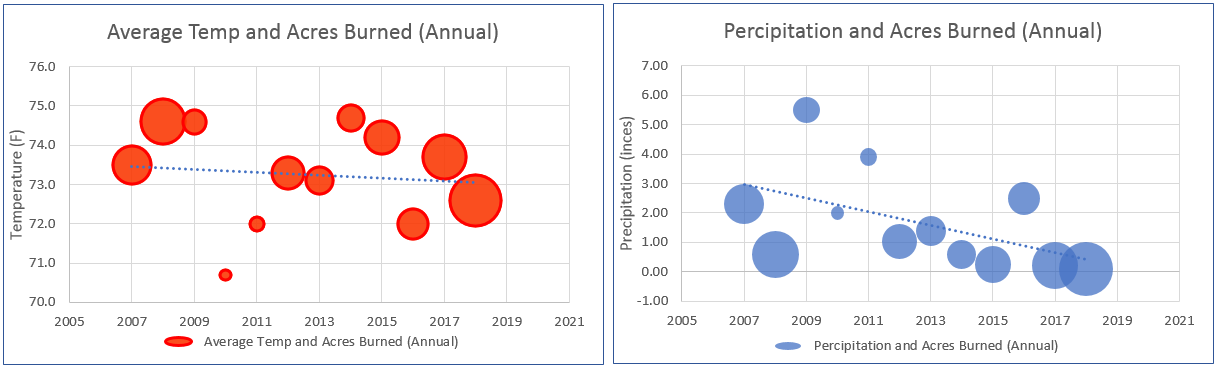

In [18]:
Image(filename= "Temp_andPrecipitation.png")

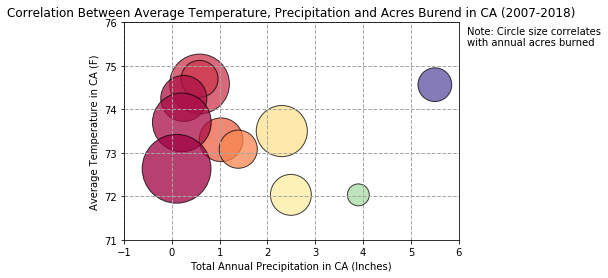

In [19]:
# Graph 
x = Fires_Season_df["Precipitation"]
y = Fires_Season_df["Avg Temp"]
z = Fires_Season_df["Acres Burned"]

# Build the scatter plots for each city types
plt.scatter(x, y, s=0.0025*z, c=x, cmap="Spectral", alpha=0.75, edgecolor="black", linewidth=1)

# Incorporate the other graph properties
plt.title("Correlation Between Average Temperature, Precipitation and Acres Burend in CA (2007-2018)")
plt.xlabel("Total Annual Precipitation in CA (Inches)")
plt.ylabel("Average Temperature in CA (F)")
plt.xlim([math.ceil(-1), math.ceil(6)])
plt.ylim([math.ceil(70.5), math.ceil(75.5)])
plt.grid(True, lw = 1, ls = '--', c = '.65')
plt.figtext(0.92, 0.8, r"Note: Circle size correlates"
           "\n"  # Newline: the backslash is interpreted as usual
           r"with annual acres burned")
plt.show()